In [1]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re

input_dir = "data_fmri_time_course/"

files_seed = natsorted(glob.glob(input_dir + "time_course_NT*.txt"))
files_target = natsorted(glob.glob(input_dir + "time_course_target_*.txt"))

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    'group': [re.findall("NTHC|NTS", x)[0] for x in files_seed]
})


df1 = pd.read_csv(files_seed[0], sep = '\t')
df1.pop(df1.columns[-1])
print(df1.columns)
df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
print(df2.columns)

for seed in df1:
    for target in df2:
        col_label = '_'.join(seed.split('_')[1:]) + '-' + '_'.join(target.split('_')[1:])
        df_connectivity[col_label] = np.nan
        


# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out01_img_file_info_life_time_mdd.csv')
df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response.csv')

subject_selected = sorted(list(df_nthc['subject_id'].unique()) + list(df_life_time_mdd['subject_id']))
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity


Index(['NTHC1001_L_aMFG_10-6mm', 'NTHC1001_L_aMFG_10mm',
       'NTHC1001_L_aMFG_14-10mm', 'NTHC1001_L_aMFG_14mm',
       'NTHC1001_L_aMFG_6mm', 'NTHC1001_L_pMFG_10-6mm', 'NTHC1001_L_pMFG_10mm',
       'NTHC1001_L_pMFG_14-10mm', 'NTHC1001_L_pMFG_14mm',
       'NTHC1001_L_pMFG_6mm', 'NTHC1001_R_aMFG_10-6mm', 'NTHC1001_R_aMFG_10mm',
       'NTHC1001_R_aMFG_14-10mm', 'NTHC1001_R_aMFG_14mm',
       'NTHC1001_R_aMFG_6mm', 'NTHC1001_R_FEF_10-6mm', 'NTHC1001_R_FEF_10mm',
       'NTHC1001_R_FEF_14-10mm', 'NTHC1001_R_FEF_14mm', 'NTHC1001_R_FEF_6mm',
       'NTHC1001_R_IFJ_10-6mm', 'NTHC1001_R_IFJ_10mm',
       'NTHC1001_R_IFJ_14-10mm', 'NTHC1001_R_IFJ_14mm', 'NTHC1001_R_IFJ_6mm',
       'NTHC1001_R_IPL_10-6mm', 'NTHC1001_R_IPL_10mm',
       'NTHC1001_R_IPL_14-10mm', 'NTHC1001_R_IPL_14mm', 'NTHC1001_R_IPL_6mm',
       'NTHC1001_R_M1_10-6mm', 'NTHC1001_R_M1_10mm', 'NTHC1001_R_M1_14-10mm',
       'NTHC1001_R_M1_14mm', 'NTHC1001_R_M1_6mm', 'NTHC1001_R_pMFG_10-6mm',
       'NTHC1001_R_pMFG_10mm', 'N

In [2]:
    
for i in tqdm(range(len(df_connectivity.index))):
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
    corr = []
    for seed in df1:
        for target in df2:
            corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
        
    df_connectivity.iloc[i, 4:] = corr


100%|██████████| 52/52 [00:04<00:00, 10.50it/s]


In [3]:
df_connectivity.to_csv('out03_functional_cconnectivity.csv', index = None)
df_connectivity

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm-FIRST_B_amyg_small.nii,L_aMFG_10-6mm-FIRST_L_amyg_small.nii,L_aMFG_10-6mm-FIRST_R_amyg_small.nii,L_aMFG_10-6mm-FSL_B_Amy_thr40.nii,L_aMFG_10-6mm-FSL_L_Amy_thr40.nii,L_aMFG_10-6mm-FSL_R_Amy_thr40.nii,...,R_preSMA_6mm-FIRST_B_amyg_small.nii,R_preSMA_6mm-FIRST_L_amyg_small.nii,R_preSMA_6mm-FIRST_R_amyg_small.nii,R_preSMA_6mm-FSL_B_Amy_thr40.nii,R_preSMA_6mm-FSL_L_Amy_thr40.nii,R_preSMA_6mm-FSL_R_Amy_thr40.nii,R_preSMA_6mm-ROI_B_Amy_Com_MNI.nii,R_preSMA_6mm-ROI_L_Amy_Com_MNI.nii,R_preSMA_6mm-ROI_R_Amy_Com_MNI.nii,R_preSMA_6mm-sgACC_6_16_-10_10mm
0,data_fmri_time_course/time_course_NTHC1001.txt,data_fmri_time_course/time_course_target_NTHC1...,1001,NTHC,0.609306,0.617629,0.561920,0.618751,0.622269,0.580288,...,-0.162263,-0.146045,-0.167930,-0.133256,-0.111450,-0.146503,-0.185408,-0.171513,-0.191589,0.204633
1,data_fmri_time_course/time_course_NTHC1003.txt,data_fmri_time_course/time_course_target_NTHC1...,1003,NTHC,-0.221408,-0.143848,-0.209581,-0.252977,-0.238722,-0.207151,...,0.287725,0.141379,0.295457,0.286032,0.189524,0.280236,0.256559,0.123032,0.266031,-0.005462
2,data_fmri_time_course/time_course_NTHC1009.txt,data_fmri_time_course/time_course_target_NTHC1...,1009,NTHC,0.373363,0.375421,0.347390,0.393299,0.390933,0.380597,...,0.439782,0.447295,0.404155,0.432477,0.425940,0.421641,0.459067,0.493536,0.292877,-0.281093
4,data_fmri_time_course/time_course_NTHC1015.txt,data_fmri_time_course/time_course_target_NTHC1...,1015,NTHC,0.101942,0.132327,0.076963,0.189565,0.213076,0.163768,...,0.029644,0.020505,0.034642,0.132185,0.113844,0.138520,-0.024151,-0.000974,-0.042727,-0.302360
5,data_fmri_time_course/time_course_NTHC1016.txt,data_fmri_time_course/time_course_target_NTHC1...,1016,NTHC,0.403216,0.380260,0.364956,0.423676,0.408042,0.380757,...,0.114045,0.260360,-0.041370,0.108501,0.248782,-0.039514,0.169685,0.279029,-0.021351,0.219539
7,data_fmri_time_course/time_course_NTHC1019.txt,data_fmri_time_course/time_course_target_NTHC1...,1019,NTHC,0.251563,0.257032,0.213583,0.255320,0.262538,0.223332,...,0.270074,0.329247,0.193313,0.278893,0.331600,0.213731,0.314164,0.369445,0.203857,0.225568
8,data_fmri_time_course/time_course_NTHC1021.txt,data_fmri_time_course/time_course_target_NTHC1...,1021,NTHC,0.268238,0.331931,0.193601,0.269616,0.313054,0.216477,...,0.193188,0.205184,0.172980,0.210409,0.213000,0.200526,0.185366,0.208948,0.148376,0.335557
9,data_fmri_time_course/time_course_NTHC1022.txt,data_fmri_time_course/time_course_target_NTHC1...,1022,NTHC,-0.423864,-0.427399,-0.409964,-0.401186,-0.409050,-0.382911,...,-0.439137,-0.449077,-0.416951,-0.407500,-0.419977,-0.383566,-0.435925,-0.441880,-0.411369,0.232344
10,data_fmri_time_course/time_course_NTHC1023.txt,data_fmri_time_course/time_course_target_NTHC1...,1023,NTHC,-0.132800,-0.058684,-0.162399,-0.090537,-0.057346,-0.103403,...,0.145799,0.162005,0.115328,0.178514,0.192108,0.146096,0.181848,0.184998,0.151641,0.245214
11,data_fmri_time_course/time_course_NTHC1024.txt,data_fmri_time_course/time_course_target_NTHC1...,1024,NTHC,-0.213229,-0.371598,-0.007782,-0.185462,-0.335343,0.007244,...,0.289887,0.146743,0.404116,0.313102,0.179776,0.414819,0.318478,0.215560,0.400753,-0.112371


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mcolors.CSS4_COLORS

a4_dims = (12, 8)

# colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(roi_cols)).as_hex()
# colors = colors[1::2] + colors[2::2] 
colors = [mcolors.CSS4_COLORS['dimgray'], 
#           mcolors.CSS4_COLORS['darkgrey'],
          mcolors.CSS4_COLORS['darkgrey'],
         ]

swarm_colors = [mcolors.CSS4_COLORS['black'], 
                mcolors.CSS4_COLORS['black'],
#                 mcolors.CSS4_COLORS['darkgray'],
               ]


def make_plot(plot_data, ylabel, xticklabel):
    group_label = ['HC', 'MDD']

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

    sns.swarmplot(y = 'tms_response', x = "ROI", data = plot_data, 
                  hue = 'group', hue_order = ['NTHC', 'NTS'],
                  order=plot_x_order,
                  dodge=True, ax = ax, 
                  facecolors='none',
                  edgecolor = "black",
                  palette = swarm_colors, 
                  alpha = .25, size=4)

    sns.barplot(y = 'tms_response', x = "ROI", data = plot_data, 
                hue = 'group', hue_order = ['NTHC', 'NTS'],
                order=plot_x_order, 
    #             errorbar=('ci', 95),
                errorbar = 'se',
                palette = colors, ax = ax)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], group_label, frameon = False, ncol = 2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(plot_x_order)])
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xticklabel)
    #ax.set_xlabel("Group");
    plt.xticks(rotation = 45)
    
    return fig

In [5]:
import re
import pandas as pd

df_connectivity = pd.read_csv('out03_functional_cconnectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

for col in df_connectivity.columns[4:]:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)

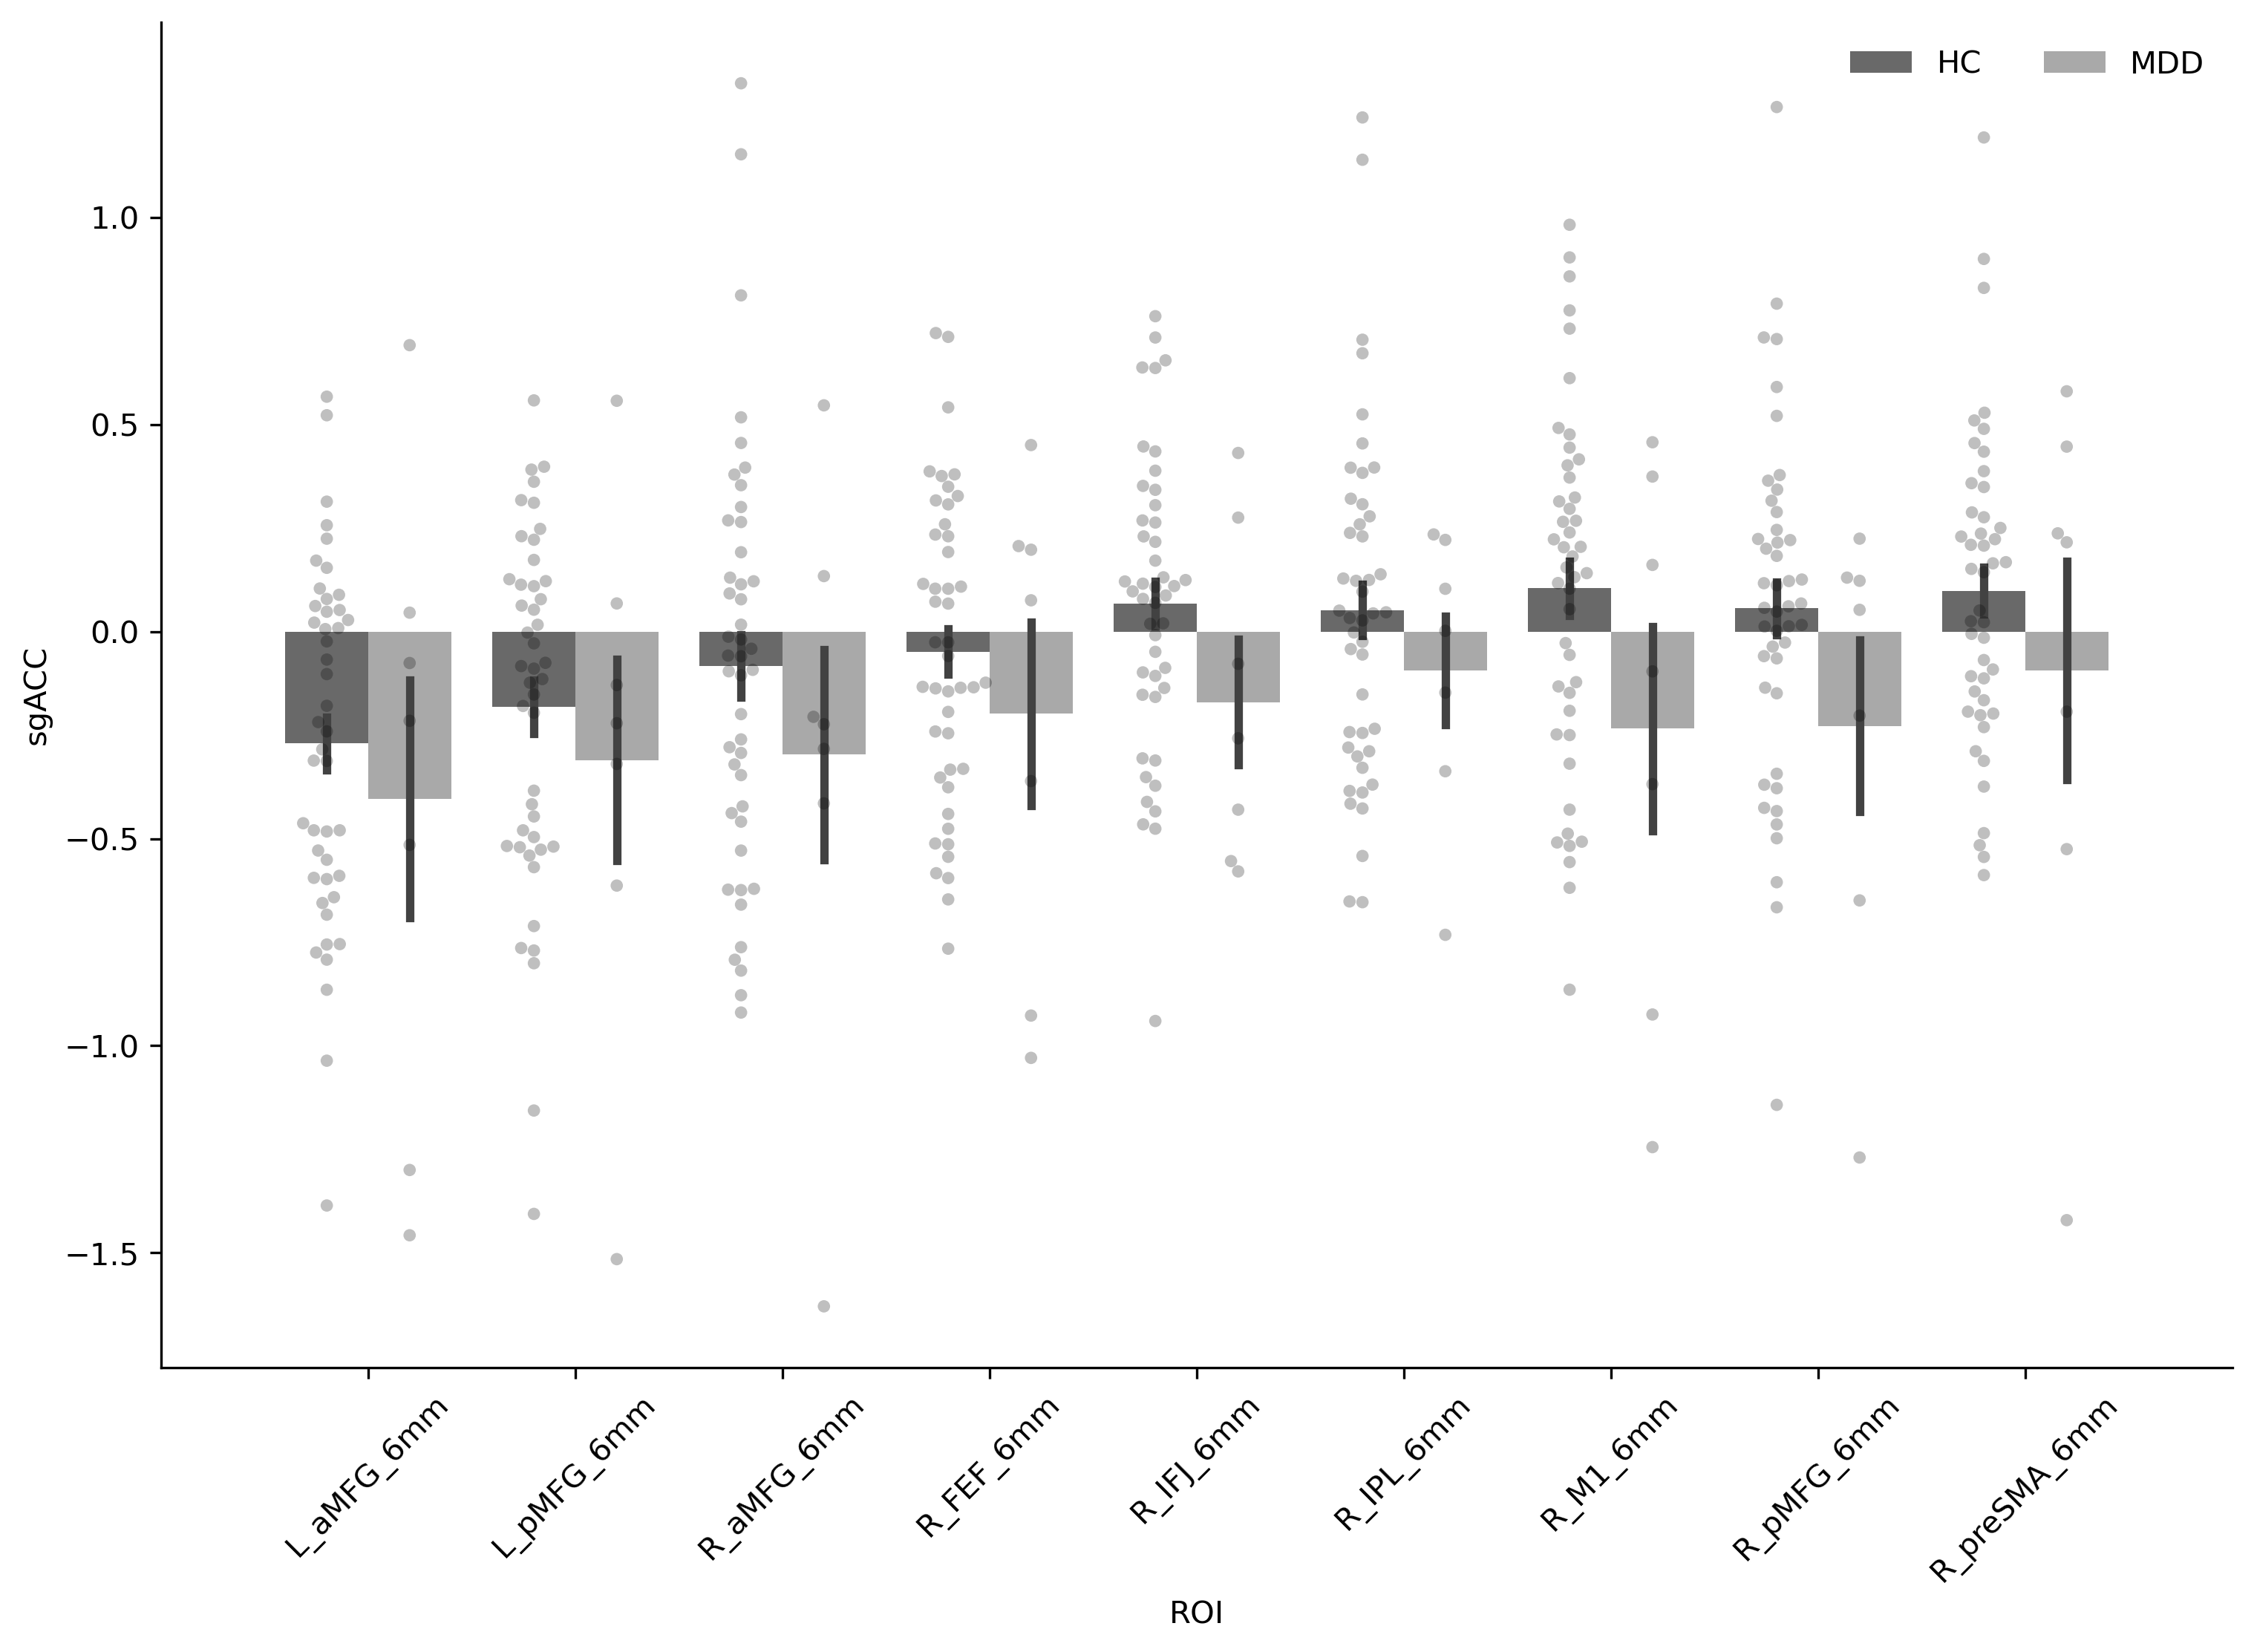

In [9]:

# 6mm mask:
plot_x_order = [x for x in df_connectivity.columns if re.search('_6mm-', x) and re.search('sgACC', x)]
cols_select = ["subject_id", "group"] + plot_x_order
xtick_label = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars=["subject_id", "group"], 
                    value_vars=plot_x_order, 
                    var_name="ROI", 
                    value_name="tms_response")

fig = make_plot(data_plot, 'sgACC', xtick_label)

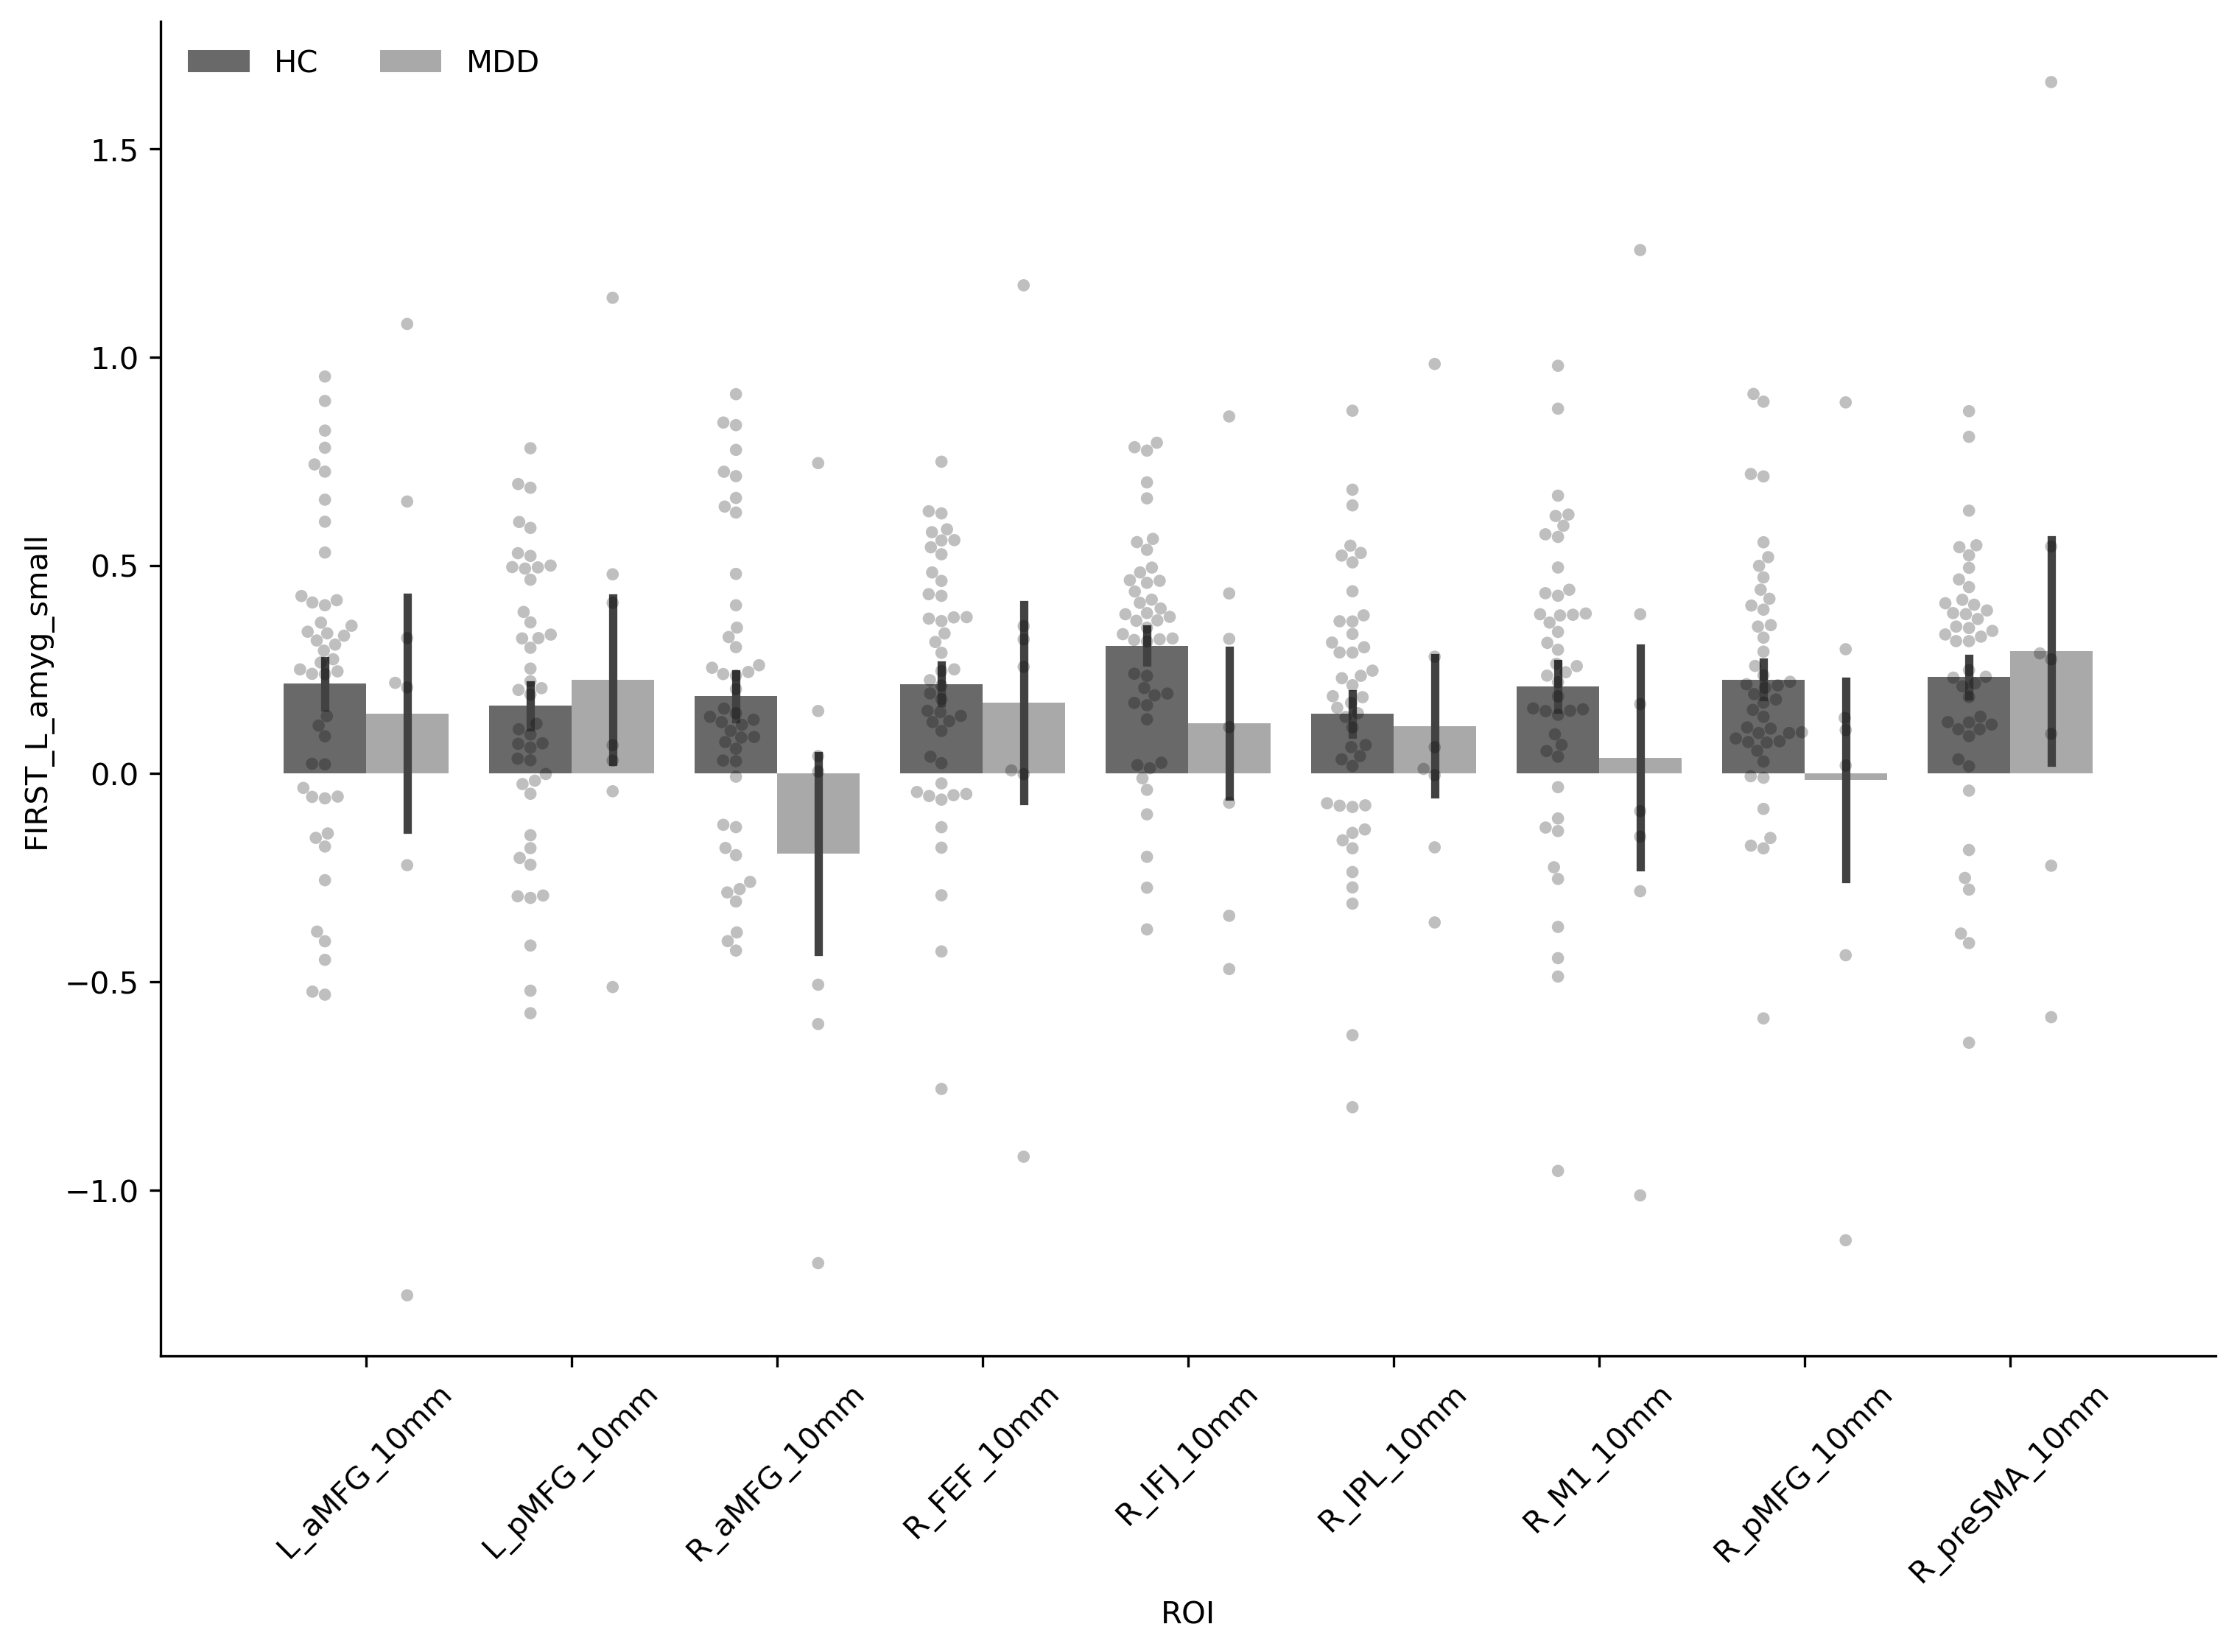

In [12]:

seed = 'FIRST_L_amyg_small'

# 6mm mask:
plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search(seed, x)]
cols_select = ["subject_id", "group"] + plot_x_order
xtick_label = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars=["subject_id", "group"], 
                    value_vars=plot_x_order, 
                    var_name="ROI", 
                    value_name="tms_response")

fig = make_plot(data_plot, seed, xtick_label)